# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Cole Nollette

### GitHub: https://github.com/nollettecs/Module7_44620

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

# Import Dependencies

In [12]:
# Import Dependencies

%pip install spacy
%pip install spacytextblob

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.8 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:
# Import Dependencies

import json
import pickle

import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

print('All prereqs installed.')
!pip list

All prereqs installed.
Package            Version
------------------ ------------
annotated-types    0.7.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.10
Brotli             1.1.0
catalogue          2.0.10
certifi            2024.8.30
cffi               1.17.1
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
cymem              2.0.8
debugpy            1.8.8
decorator          5.1.1
en-core-web-sm     3.7.1
exceptiongroup     1.2.2
executing          2.1.0
h2                 4.1.0
hpack              4.0.0
hyperframe         6.0.1
idna               3.10
importlib_metadata 8.5.0
ipykernel          6.29.5
ipython            8.29.0
jedi               0.19.2
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
langcodes          3.3.0
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplot

# Question 1:

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

## Article:
Topic is about the current housing price trend and what Bankrate foresees in the near future https://www.bankrate.com/real-estate/case-shiller/

In [5]:
# Beatiful Soup Dependency
!pip install beautifulsoup4

  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)


In [6]:
import requests
from bs4 import BeautifulSoup

# Step 1: Get the content of the webpage
url = "https://www.bankrate.com/real-estate/case-shiller/"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Step 2: Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Step 3: Save the HTML content to a file
    with open("case_shiller_article.html", "w", encoding="utf-8") as file:
        file.write(str(soup))
        
    print("HTML file saved as 'case_shiller_article.html'")
else:
    print(f"Failed to retrieve the article. Status code: {response.status_code}")

HTML file saved as 'case_shiller_article.html'


# Question 2:

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [16]:
import requests
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Fetch the HTML content from the URL
url = 'https://www.bankrate.com/real-estate/case-shiller/'
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful
html_content = response.text

# Save the HTML content to a file
file_path = 'case_shiller_article.html'
with open(file_path, 'w', encoding='utf-8') as file:
    file.write(html_content)

print(f"HTML content saved to '{file_path}'")

# Parse the HTML and extract the text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Print the extracted article content
print("\nExtracted Article Text:\n")
print(article_text)

# Load SpaCy and add SpaCyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Perform sentiment analysis on the text
doc = nlp(article_text)
polarity = doc._.blob.polarity

# Determine the sentiment label
if polarity > 0:
    sentiment_label = "Positive"
elif polarity < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

# Print the polarity score with an appropriate label
print(f"\nPolarity score: {polarity:.2f} ({sentiment_label})")

# Count the number of sentences in the text
num_sentences = len(list(doc.sents))
print(f"Number of sentences in the article: {num_sentences}")

HTML content saved to 'case_shiller_article.html'

Extracted Article Text:










Case-Shiller Index: Home Price Growth Finally Slows | Bankrate
































 












Skip to Main Content





Bankrate

















Banking
Caret Right Icon





Caret Left Icon
All





Banking


Checking & savingsCaret Right Icon


CDsCaret Right Icon


Money marketCaret Right Icon


BanksCaret Right Icon




Explore all banking resources
Arrow Right Icon







Caret Left Icon
 Banking






Compare accounts



Best savings accounts



Best high-yield savings accounts



Best business checking accounts



Best checking accounts






Get guidance




Savings calculator



All savings calculators



Savings rate trends



Savings resources









Savings basics
5 min read









How to start saving
4 min read











Compare accounts



Best CD rates



Best 6-month CD rates



Best 1-year CD rates



Best 5-year CD rates






Get guidance




CD calculator



CD 

# Question 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [19]:
# Process the article text
doc = nlp(article_text)

# Tokenize, normalize to lowercase, and count frequencies
tokens = [token.text.lower() for token in doc if token.is_alpha]  # Only consider alphabetic tokens
token_frequencies = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_frequencies.most_common(5)

# Print the results
print("5 Most Frequent Tokens:")
for token, frequency in most_common_tokens:
    print(f"Token: {token}, Frequency: {frequency}")

5 Most Frequent Tokens:
Token: icon, Frequency: 97
Token: the, Frequency: 77
Token: home, Frequency: 55
Token: best, Frequency: 50
Token: right, Frequency: 46


# Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [21]:
# Process the article text
doc = nlp(article_text)

# Extract lemmas, normalize to lowercase, and count frequencies
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha]  # Only consider alphabetic tokens
lemma_frequencies = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_frequencies.most_common(5)

# Print the results
print("5 Most Frequent Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {frequency}")

5 Most Frequent Lemmas:
Lemma: icon, Frequency: 97
Lemma: the, Frequency: 77
Lemma: home, Frequency: 59
Lemma: rate, Frequency: 51
Lemma: loan, Frequency: 49


# Question 5:

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [24]:
!pip install matplotlib

  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.7 MB/s eta 0:00:00
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


HTML content saved to 'case_shiller_article.html'


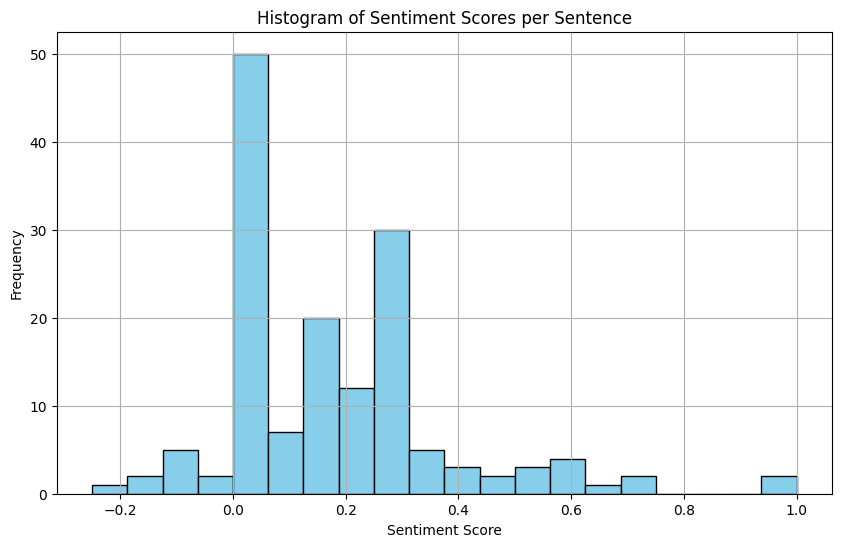

In [25]:
import requests
from bs4 import BeautifulSoup
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Fetch the HTML content from the URL
url = 'https://www.bankrate.com/real-estate/case-shiller/'
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful
html_content = response.text

# Save the HTML content to a file
file_path = 'case_shiller_article.html'
with open(file_path, 'w', encoding='utf-8') as file:
    file.write(html_content)

print(f"HTML content saved to '{file_path}'")

# Parse the HTML and extract the text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Create a list to store the sentiment scores for each sentence
sentence_scores = []

# Loop through each sentence in the processed text
for sent in doc.sents:
    # Get the sentiment score of the sentence (polarity)
    sentence_scores.append(sent._.blob.polarity)

# Plot a histogram of the sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, edgecolor='black', color='skyblue')
plt.title('Histogram of Sentiment Scores per Sentence')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Oberservation

The most common range of scores according to this histogram are from 0 - 0.3! This indicates a fairly neutral article with some slight postive tones.

# Question 6:

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

HTML content saved to 'case_shiller_article.html'


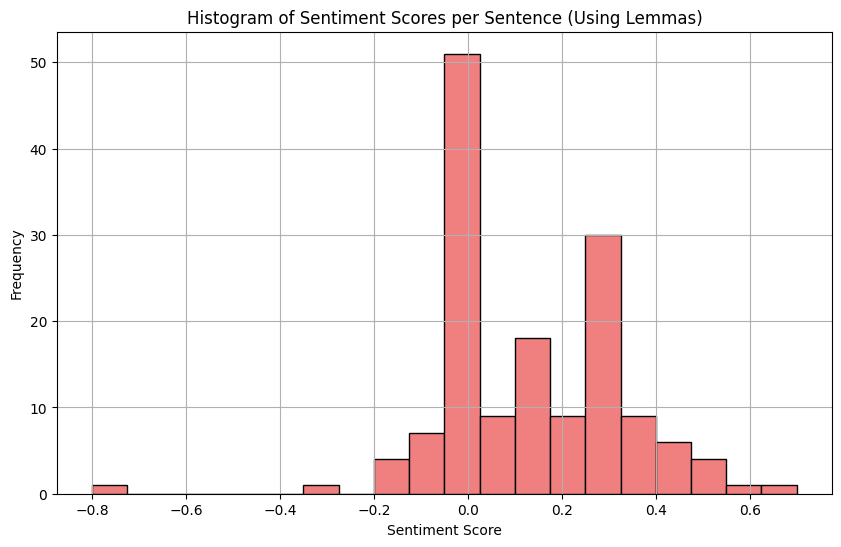

In [27]:
import requests
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from textblob import TextBlob

# Fetch the HTML content from the URL
url = 'https://www.bankrate.com/real-estate/case-shiller/'
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful
html_content = response.text

# Save the HTML content to a file
file_path = 'case_shiller_article.html'
with open(file_path, 'w', encoding='utf-8') as file:
    file.write(html_content)

print(f"HTML content saved to '{file_path}'")

# Parse the HTML and extract the text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Create a list to store the sentiment scores for each sentence based on lemmas
sentence_scores_lemmas = []

# Loop through each sentence in the processed text
for sent in doc.sents:
    # Get the sentiment score of the sentence using lemmas
    # We'll concatenate lemmas to form the sentence and then analyze polarity
    sentence_text_lemmas = " ".join([token.lemma_ for token in sent if token.is_alpha])  # Consider only alphabetic tokens
    sentence_sentiment = TextBlob(sentence_text_lemmas).sentiment.polarity
    sentence_scores_lemmas.append(sentence_sentiment)

# Plot a histogram of the sentiment scores based on lemmas
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores_lemmas, bins=20, edgecolor='black', color='lightcoral')
plt.title('Histogram of Sentiment Scores per Sentence (Using Lemmas)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Observation

The sentiment score from the lemma histogram ranges from 0 - 0.3! This also indicates that the article is mostly neutral with slight positive tones throughout.

# Question 7:

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

##### * Cutoff Score (tokens): 0.14
##### * Cutoff Score (lemmas): 0.13

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [30]:
import numpy as np

# `sentence_scores` contains the scores based on tokens (from Question 5)
# `lemma_scores` contains the scores based on lemmas (from Question 6)

# Calculate the cutoff scores
cutoff_tokens = np.median(sentence_scores)
cutoff_lemmas = np.median(sentence_scores_lemmas)

# Print the cutoff scores
print("Cutoff Score (tokens):", cutoff_tokens)
print("Cutoff Score (lemmas):", cutoff_lemmas)

# The median is used because it splits the data into two halves, ensuring fewer than half of the scores 
# are greater than the cutoff. These scores will serve as natural cutoff point.

Cutoff Score (tokens): 0.14285714285714285
Cutoff Score (lemmas): 0.13636363636363635


# Question 8:

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [33]:
from textblob import TextBlob

# Assuming 'article_text' contains the full article's text
# Split the article into sentences (can be done using SpaCy's sentence segmentation if preferred)
article_sentences = article_text.split('\n')  # Can also use SpaCy for better sentence splitting

# Make sure we have the sentiment scores for each sentence
sentence_scores = [TextBlob(sent).sentiment.polarity for sent in article_sentences]

# Initialize an empty list to hold the summary sentences
summary_sentences = []

# Add sentences with a positive polarity score (greater than 0.0) to the summary list
for i, sent in enumerate(article_sentences):
    if sentence_scores[i] > 0.0:  # You can adjust this threshold based on your cutoff score
        summary_sentences.append(sent.strip())  # Clean extra spaces

# Join the selected sentences to generate the summary
summary_text = ' '.join(summary_sentences)

# Print the summary
print("Summary of the Article (Token-Based):")
print(summary_text)

# Print the number of sentences in the summary
print("\nNumber of Sentences in the Summary:", len(summary_sentences))

Summary of the Article (Token-Based):
Skip to Main Content Caret Right Icon Checking & savingsCaret Right Icon CDsCaret Right Icon Money marketCaret Right Icon BanksCaret Right Icon Arrow Right Icon Best savings accounts Best high-yield savings accounts Best business checking accounts Best checking accounts Best CD rates Best 6-month CD rates Best 1-year CD rates Best 5-year CD rates Best bank bonuses Best banks of 2024 Best online banks Arrow Right Icon Caret Right Icon PurchaseCaret Right Icon RefinanceCaret Right Icon Real estateCaret Right Icon Arrow Right Icon Best mortgage lenders Best refinance lenders Best cash-out refinance lenders Find an expert who knows the market. Compare trusted real estate agents all in one place. How much is my house worth? Real estate resources Arrow Right Icon Caret Right Icon InvestingCaret Right Icon RetirementCaret Right Icon Financial advisingCaret Right Icon Arrow Right Icon Best investments Best index funds Best long-term investments Best short-

# Question 9:

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [34]:
from textblob import TextBlob

# Calculate the polarity score for the summary
summary_blob = TextBlob(summary_text)
summary_polarity = summary_blob.sentiment.polarity

# Count the number of sentences in the summary
num_summary_sentences = len(summary_sentences)

# Print the results
print("\nPolarity Score of the Summary (Token-Based):", summary_polarity)
print("Number of Sentences in the Summary:", num_summary_sentences)


Polarity Score of the Summary (Token-Based): 0.37879094061867186
Number of Sentences in the Summary: 152


# Question 10:

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [38]:
from textblob import TextBlob

# Process the article text
doc = nlp(article_text)

# Initialize a list to store sentence scores
lemma_scores = []

# Iterate through sentences in the document
for sent in doc.sents:
    # Extract lemmas from the sentence, ignoring punctuation and non-alphabetic tokens
    lemmas = [token.lemma_.lower() for token in sent if token.is_alpha]
    
    # Create a TextBlob from the lemmatized sentence to get sentiment
    sentence_blob = TextBlob(" ".join(lemmas))
    
    # Get the polarity score of the sentence
    sentence_score = sentence_blob.sentiment.polarity
    lemma_scores.append(sentence_score)

# Define the cutoff score based on lemmas (use the median or previously identified cutoff)
lemma_cutoff = np.median(lemma_scores)

# Generate a summary based on the cutoff score for lemmas
summary_sentences_lemmas = [sent.text.strip() for sent, score in zip(doc.sents, lemma_scores) if score > lemma_cutoff]

# Combine sentences into a single summary text
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Print the summary
print("Article Summary (Lemma-Based):")
print(summary_text_lemmas)

# Print the number of sentences in the summary
print("\nNumber of Sentences in the Summary:", len(summary_sentences_lemmas))

Article Summary (Lemma-Based):
Right Icon





Caret Left Icon
All





Banking


Checking & savingsCaret Right Icon


CDsCaret Right Icon


Money marketCaret Right Icon BanksCaret Right Icon




Explore all banking resources Right Icon







Caret Left Icon
 Banking






Compare accounts



Best savings accounts



Best high-yield savings accounts



Best business checking accounts



Best checking accounts






Get guidance




Savings calculator All savings calculators



Savings rate trends



Savings resources









Savings basics
5 min read









How to start saving
4 min read











Compare accounts



Best CD rates



Best 6-month CD rates



Best 1-year CD rates



Best 5-year CD rates






Get guidance




CD calculator



CD ladder calculator



CD rate trends



CD resources









CD basics
7 min read









How to invest with CDs
6 Best bank bonuses




Get guidance




Best banks of 2024



Best online banks



Bank reviews



Federal Reserve news 






# Question 11:

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [39]:
from textblob import TextBlob
import numpy as np

# Process the article text
doc = nlp(article_text)

# Initialize a list to store sentence scores
lemma_scores = []

# Iterate through sentences in the document
for sent in doc.sents:
    # Extract lemmas from the sentence, ignoring punctuation and non-alphabetic tokens
    lemmas = [token.lemma_.lower() for token in sent if token.is_alpha]
    
    # Create a TextBlob from the lemmatized sentence to get sentiment
    sentence_blob = TextBlob(" ".join(lemmas))
    
    # Get the polarity score of the sentence
    sentence_score = sentence_blob.sentiment.polarity
    lemma_scores.append(sentence_score)

# Define the cutoff score based on lemmas (use the median or previously identified cutoff)
lemma_cutoff = np.median(lemma_scores)

# Generate a summary based on the cutoff score for lemmas
summary_sentences_lemmas = [sent.text.strip() for sent, score in zip(doc.sents, lemma_scores) if score > lemma_cutoff]

# Combine sentences into a single summary text
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Print the summary
print("Article Summary (Lemma-Based):")
print(summary_text_lemmas)

# Print the number of sentences in the summary
print("\nNumber of Sentences in the Summary:", len(summary_sentences_lemmas))

# Calculate the polarity of the summary
summary_blob = TextBlob(summary_text_lemmas)
summary_polarity = summary_blob.sentiment.polarity

# Print the polarity score of the summary
print(f"\nPolarity score of the summary: {summary_polarity:.2f}")


Article Summary (Lemma-Based):
Right Icon





Caret Left Icon
All





Banking


Checking & savingsCaret Right Icon


CDsCaret Right Icon


Money marketCaret Right Icon BanksCaret Right Icon




Explore all banking resources Right Icon







Caret Left Icon
 Banking






Compare accounts



Best savings accounts



Best high-yield savings accounts



Best business checking accounts



Best checking accounts






Get guidance




Savings calculator All savings calculators



Savings rate trends



Savings resources









Savings basics
5 min read









How to start saving
4 min read











Compare accounts



Best CD rates



Best 6-month CD rates



Best 1-year CD rates



Best 5-year CD rates






Get guidance




CD calculator



CD ladder calculator



CD rate trends



CD resources









CD basics
7 min read









How to invest with CDs
6 Best bank bonuses




Get guidance




Best banks of 2024



Best online banks



Bank reviews



Federal Reserve news 






# Question 12:

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

# Analyzing the Polarity Scores

The polarity scores of the intial article weren't nearly as positive as the summaries.  The summaries are based on sentences with higher sentiment scores, as determined by the predefined cutoff. This excludes sentences with neutral or less pronounced sentiment, leading to a selection of more emotionally charged content. By including mostly sentences with stronger positive sentiment, the polarity score of the summaries naturally skews higher than that of the original article.  The original article contains a mix of neutral sentences that contribute less to the overall sentiment score. These neutral sentences lower the overall polarity, contrasting with the summaries, which feature only more sentimentally intense sentences.

# Question 13:

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I personally think the original summary gave me more of an accurate polarity score and less bias.  The predefined cutoff gave too much bias for me to feel that it was an accurate score.  The article actually felt it wasn't only positive, but could also be negative at times, as they were conversing over the foreseeable future of the housing market. Overall, I feel the inital article summary is the most accurate.

# Convert to HTML

In [40]:
!jupyter nbconvert --to html article-summarizer.ipynb

[NbConvertApp] Converting notebook article-summarizer.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 461345 bytes to article-summarizer.html
